In [1]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./datasets/diamonds/diamonds.csv")

### EDA for datatypes, missing values, categorical vs continuous variables

In [3]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

The output variable is continuous --> regression problem

There are 6 continuous conditioning variables: carat (carati), depth, table, x, y, z.

There are 3 categoricals variables: color, clarity, cut

In [6]:
df["z-depth"] = df["depth"]*df["z"]/100
df["table-width"] = df["table"]*df["x"] / 100

<Axes: xlabel='price', ylabel='Count'>

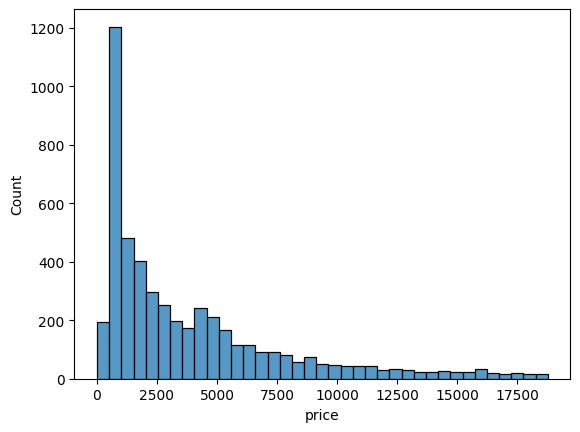

In [8]:
sns.histplot(df["price"])

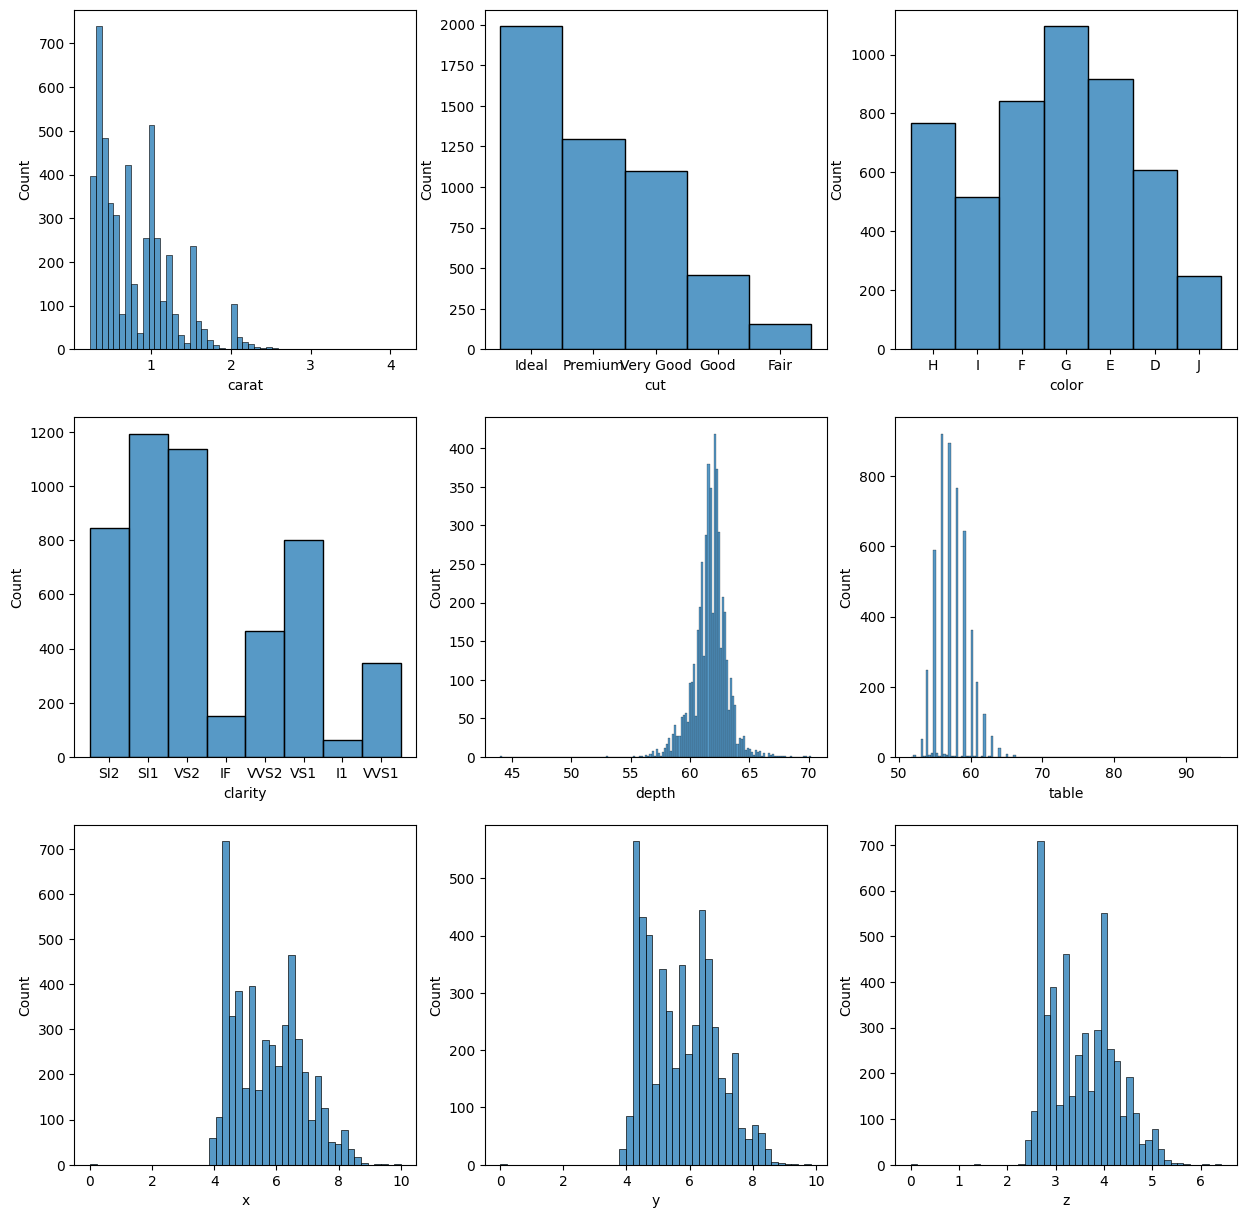

In [44]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)

for ax, col in zip(axes, [el for el in df.columns if el != "price"]):
  sns.histplot(df[col], ax = ax)
  #ax.set_title(col)

Looking for information online, I have read about the importance of carat when assesing the price of diamonds. Basically, different ranges of carats determine different level of prices. To test this, I will run a smal regression tree in order having as output variable the price and as input only the carat.

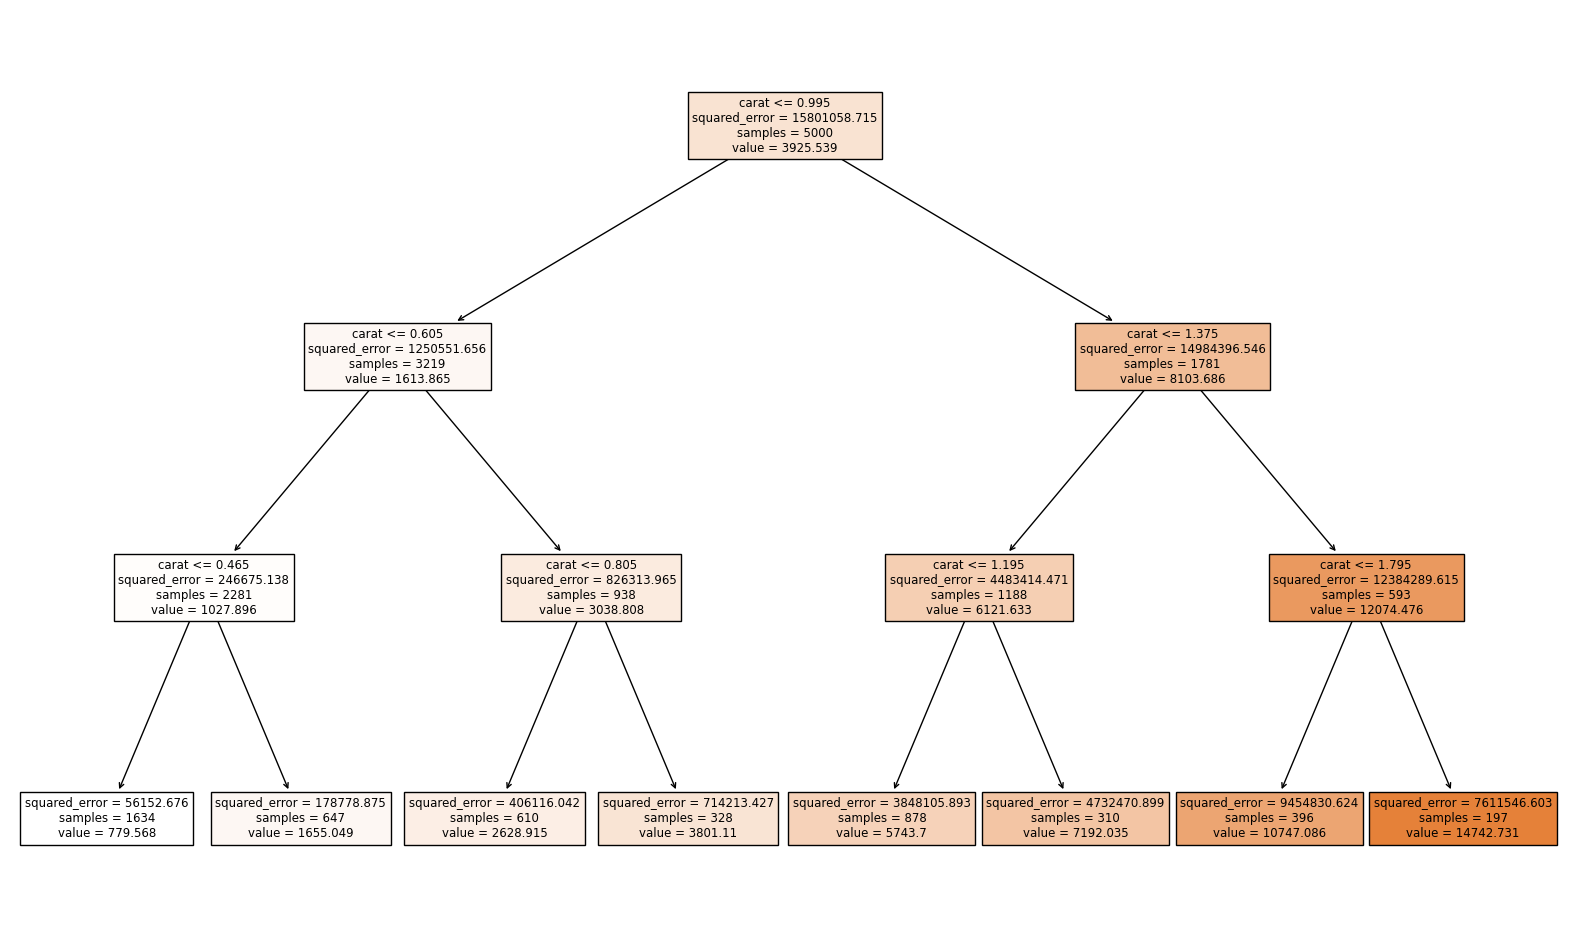

Splitting points: [0.4650000035762787, 0.6050000190734863, 0.8050000071525574, 0.9950000047683716, 1.1950000524520874, 1.375, 1.7949999570846558]


In [60]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

X = df[['carat']]
y = df['price']

model = DecisionTreeRegressor(max_depth=3)  
model.fit(X, y)

plt.figure(figsize=(20, 12))
from sklearn.tree import plot_tree
plot_tree(model, feature_names=['carat'], filled=True)
plt.show()
# Extracting splitting points from the decision tree
splitting_points = sorted(model.tree_.threshold[model.tree_.threshold != -2])

# Printing splitting points
print("Splitting points:", splitting_points)

Now, I wanna compare the distributions of the output variable across different ranges of carat to check whether there are differences.

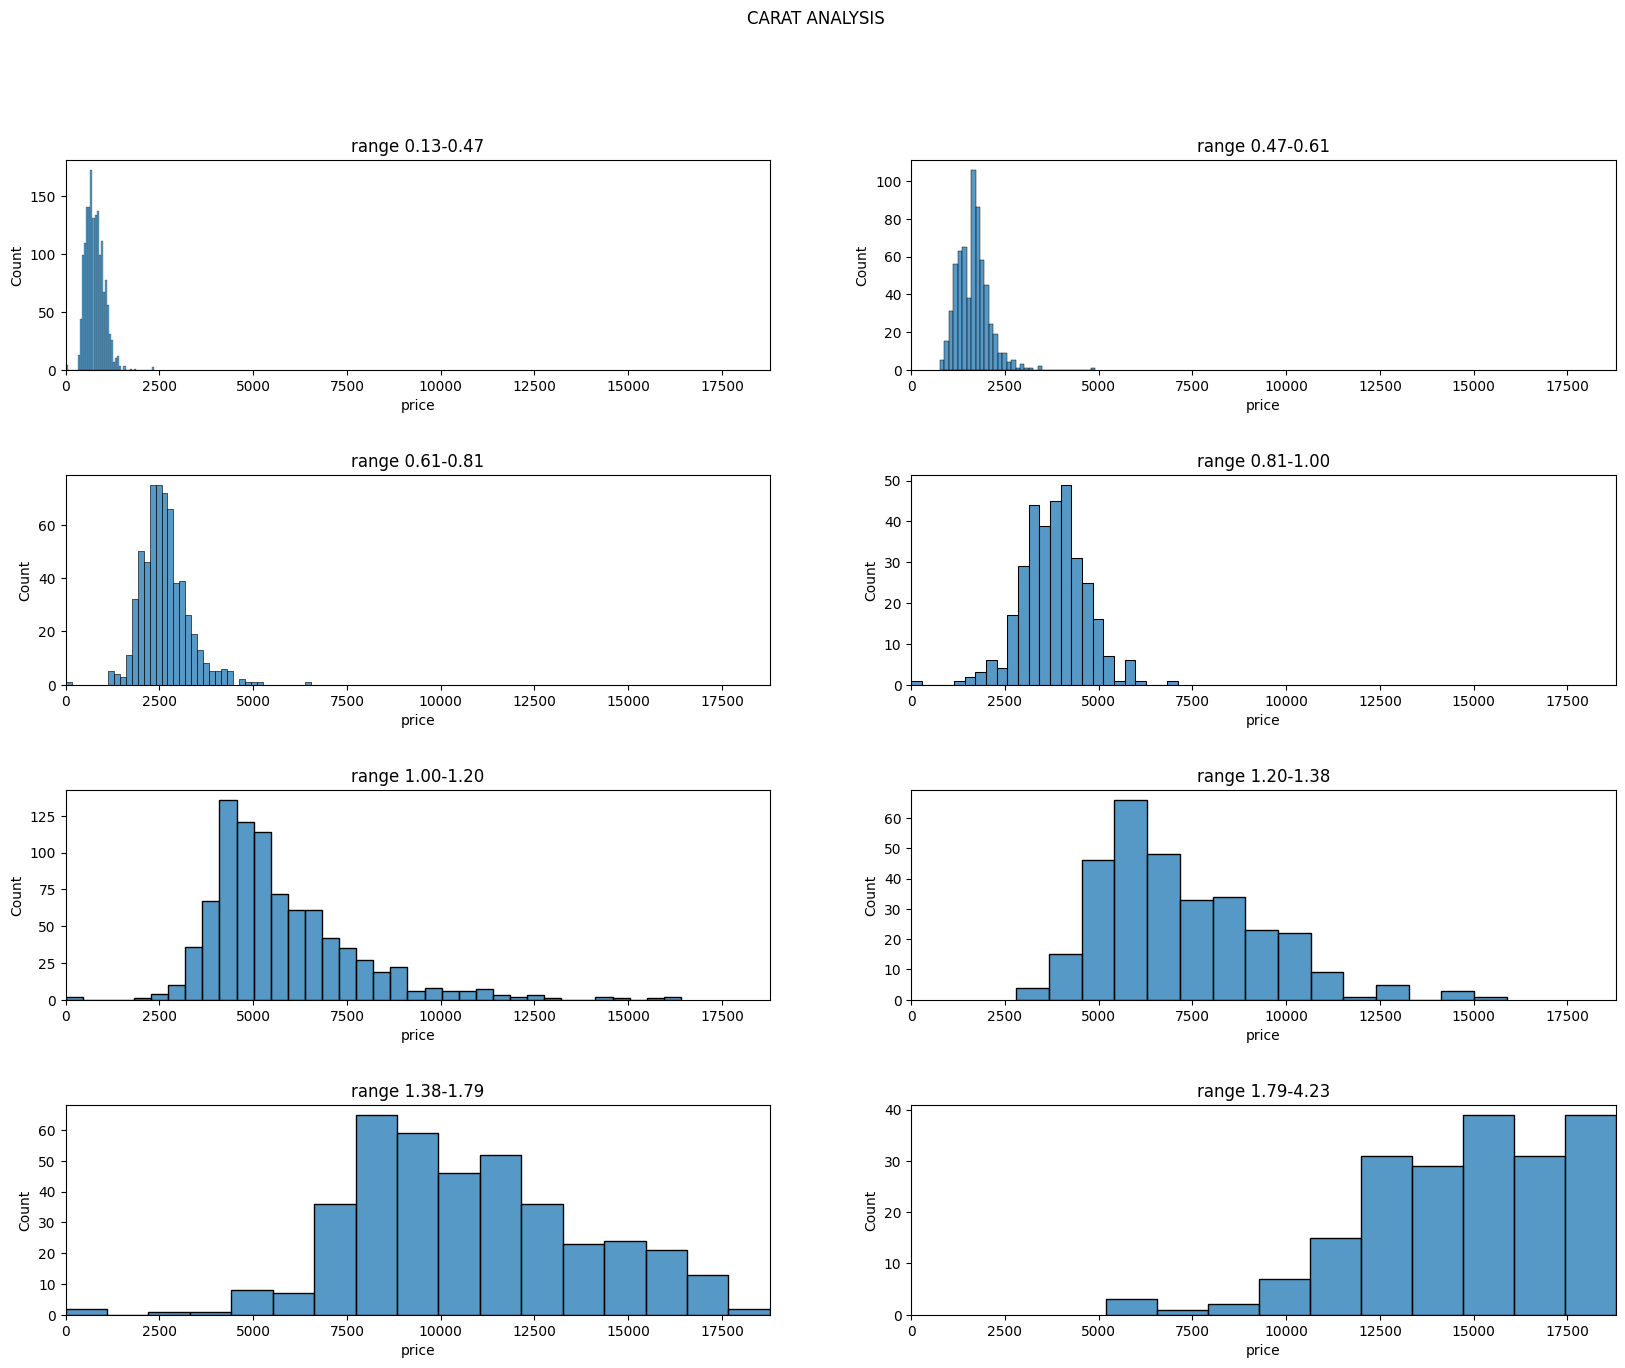

In [70]:
n_points = len(splitting_points)
fig, axes = plt.subplots(nrows = 4, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 15)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("CARAT ANALYSIS")
#GET ALL THE THRESHOLDS
_eps: float = 0.1
_limits_: list[tuple] = [(df["carat"].min() - _eps, splitting_points[0])]\
    + [(splitting_points[i], splitting_points[i+1]) for i in range(len(splitting_points)-1)]\
        + [(splitting_points[-1], df["carat"].max()+_eps)]

for ax, _thresholds in zip(axes, _limits_):
  ax.set_xlim(df['price'].min(), df['price'].max())
  lb, ub = _thresholds #define lower and upper bound of the range
  sns.histplot(df[(df["carat"] >= lb) & (df["carat"] < ub)]["price"], ax = ax)
  ax.set_title(f"range {lb:.2f}-{ub:.2f}")

It seems that the carat is already a good variable to determine different ranges of prices, this shows it will be important to consider it in future analysis.

Moreover, other "Cs" should have an important impact in determing the price, let's test this by comparing the distribution of the price across different values of each "Cs" variable.

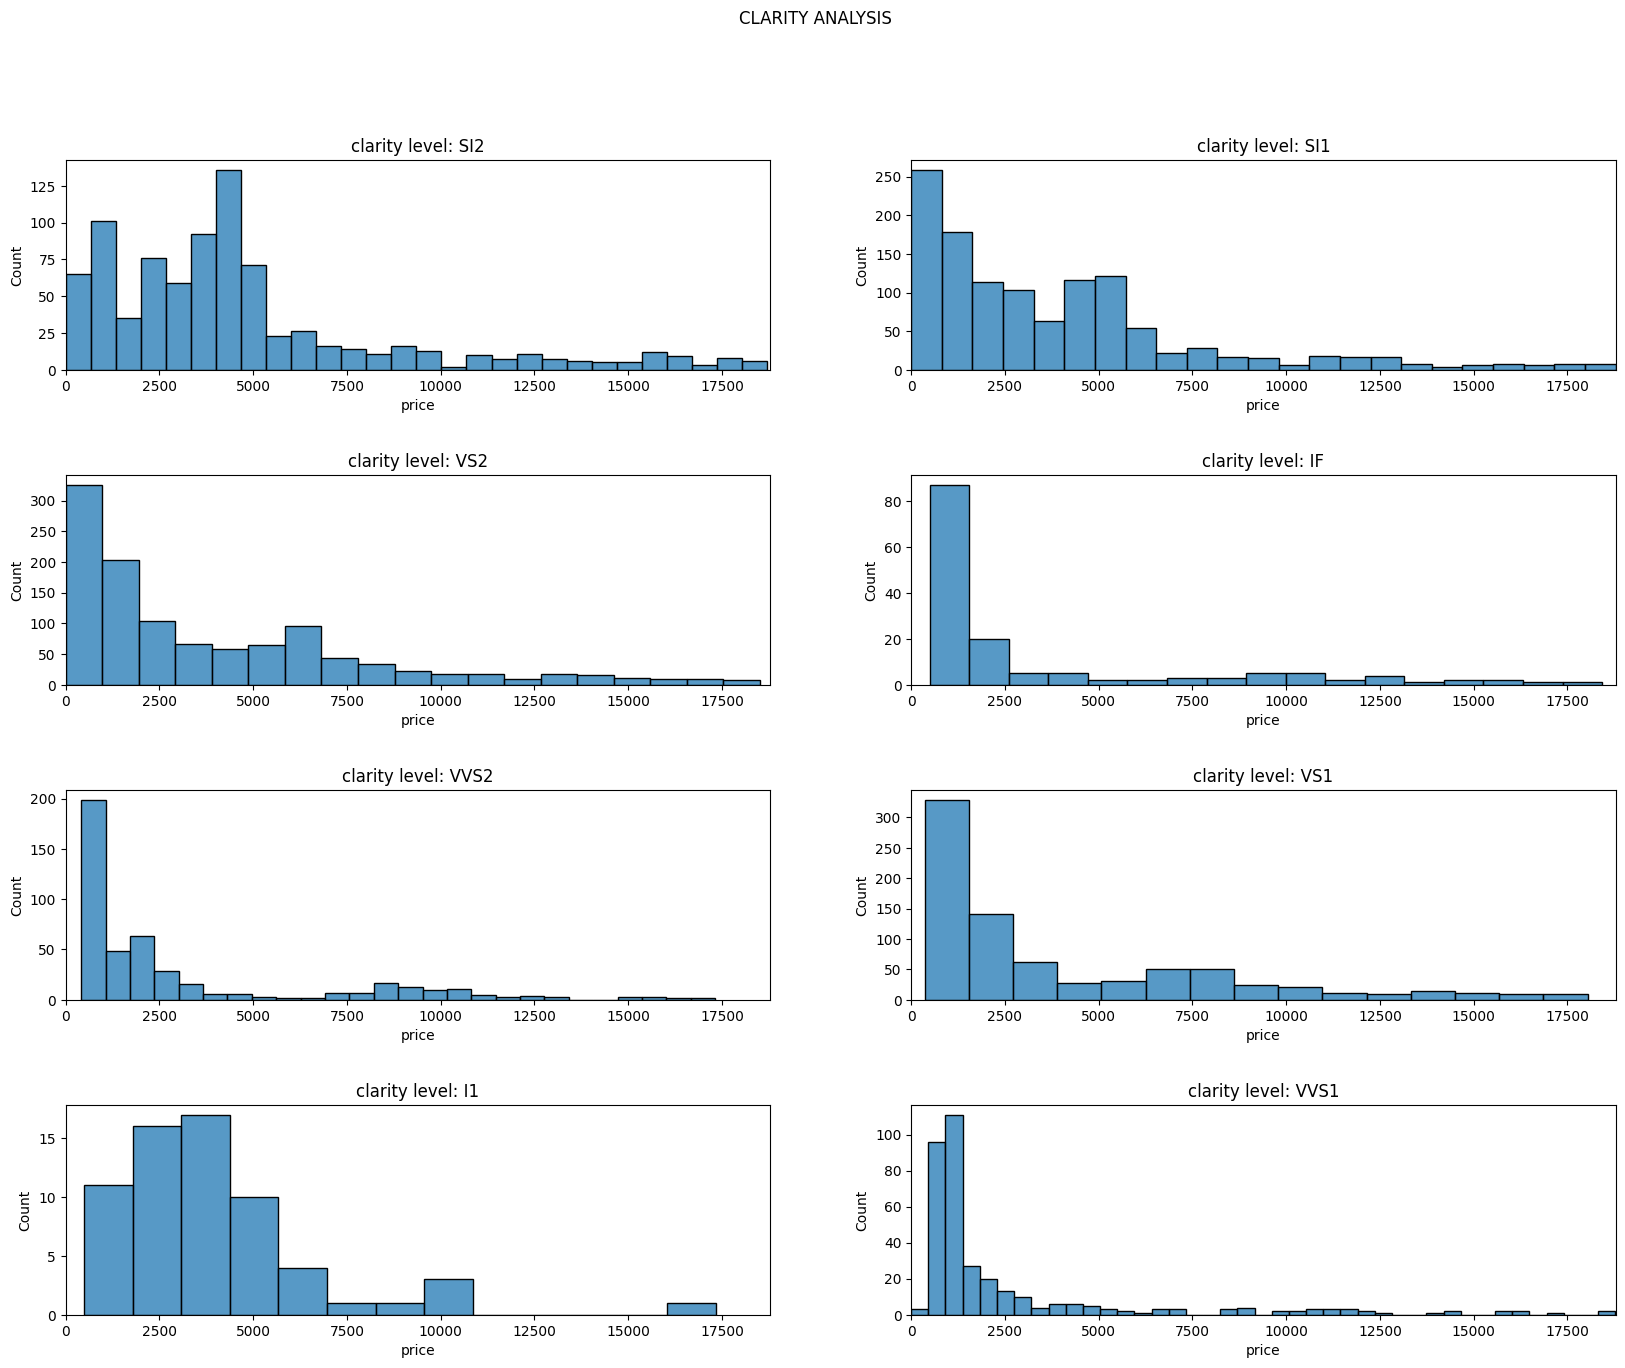

In [71]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 15)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("CLARITY ANALYSIS")
#GET ALL THE THRESHOLDS
_col = "clarity"

for ax, _clarity_level in zip(axes, df[_col].unique()):
  ax.set_xlim(df['price'].min(), df['price'].max())
  sns.histplot(df[df[_col] == _clarity_level]["price"], ax = ax)
  ax.set_title(f"{_col} level: {_clarity_level}")

Considered alone, this variable doesn't seem able to clearly capture different level of prices

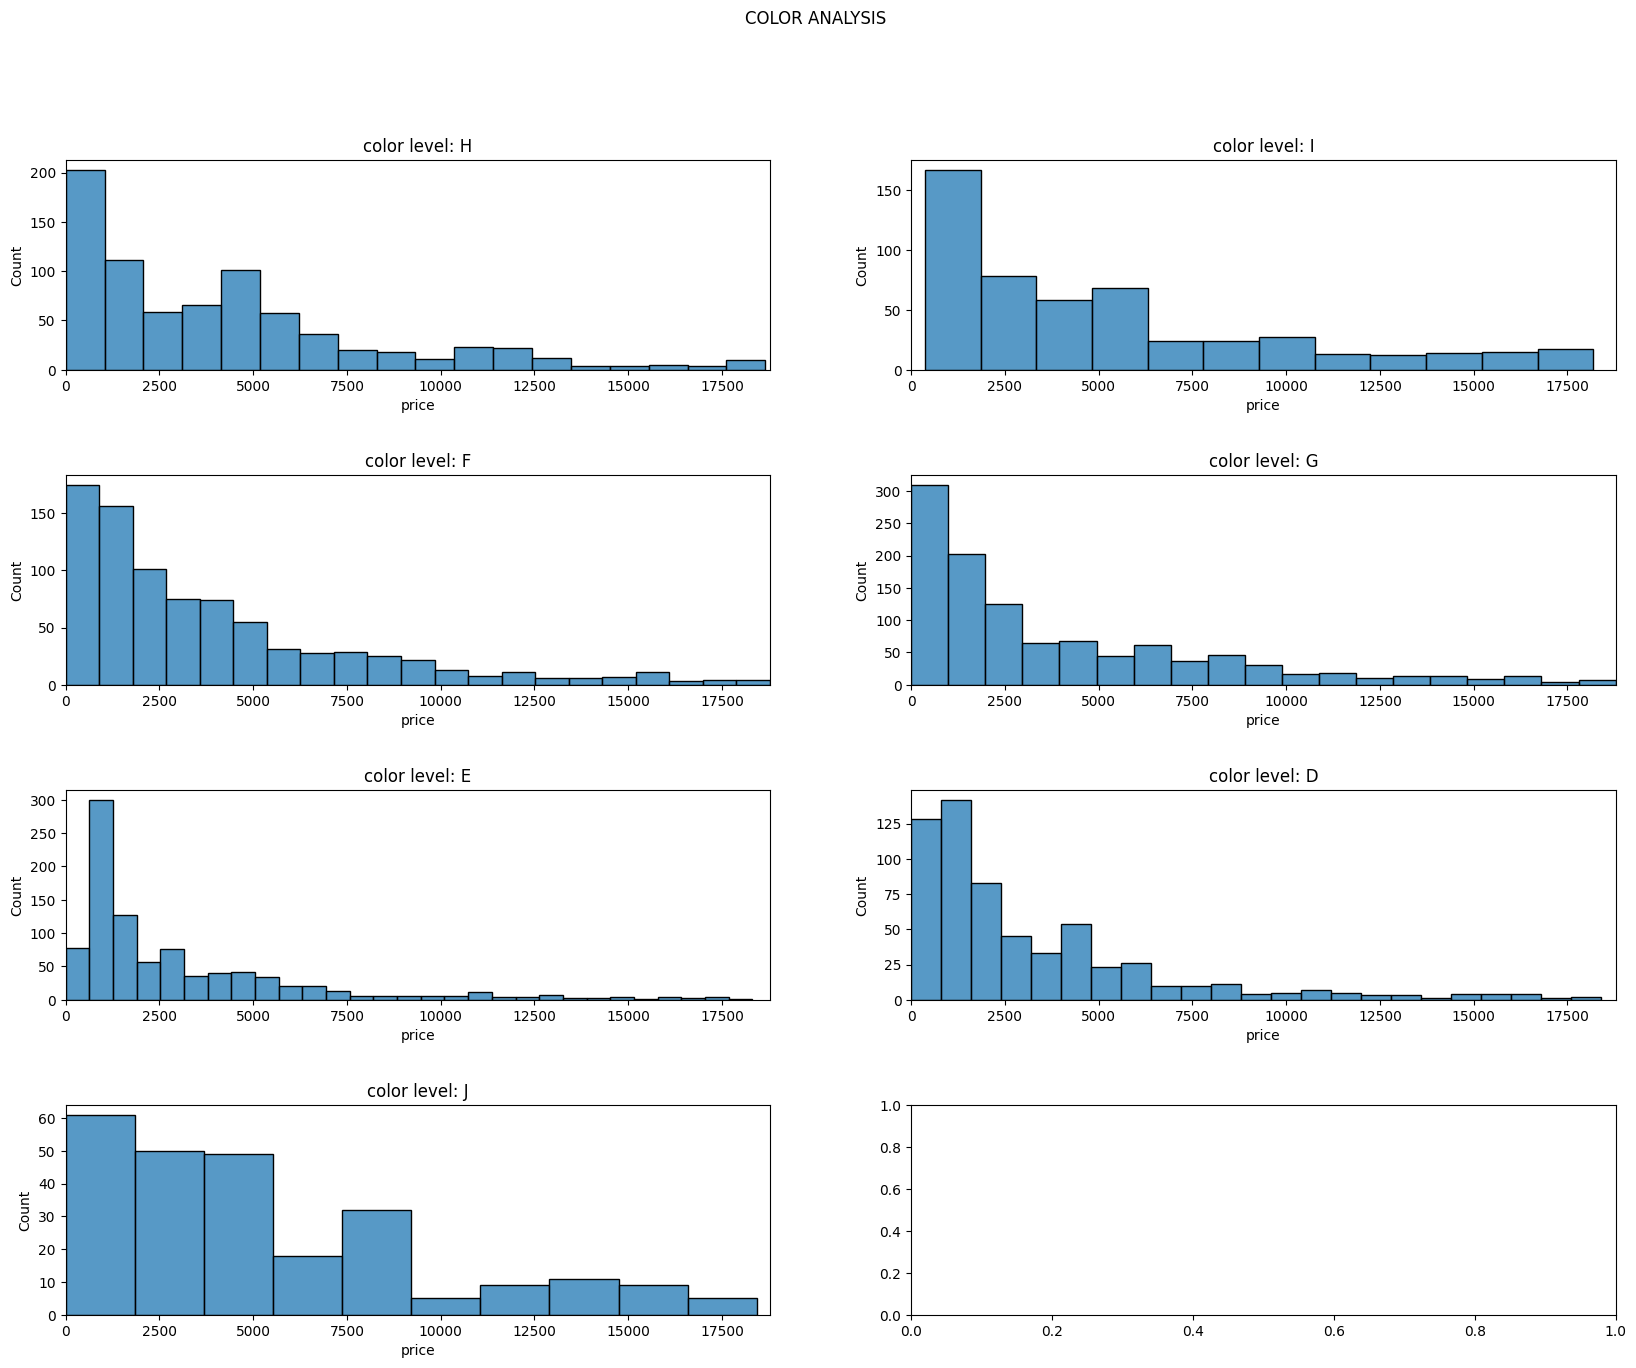

In [72]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 15)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("COLOR ANALYSIS")
#GET ALL THE THRESHOLDS
_col = "color"

for ax, _color_level in zip(axes, df[_col].unique()):
  ax.set_xlim(df['price'].min(), df['price'].max())
  sns.histplot(df[df[_col] == _color_level]["price"], ax = ax)
  ax.set_title(f"{_col} level: {_color_level}")

Considered alone, this variable doesn't seem able to clearly capture different level of prices

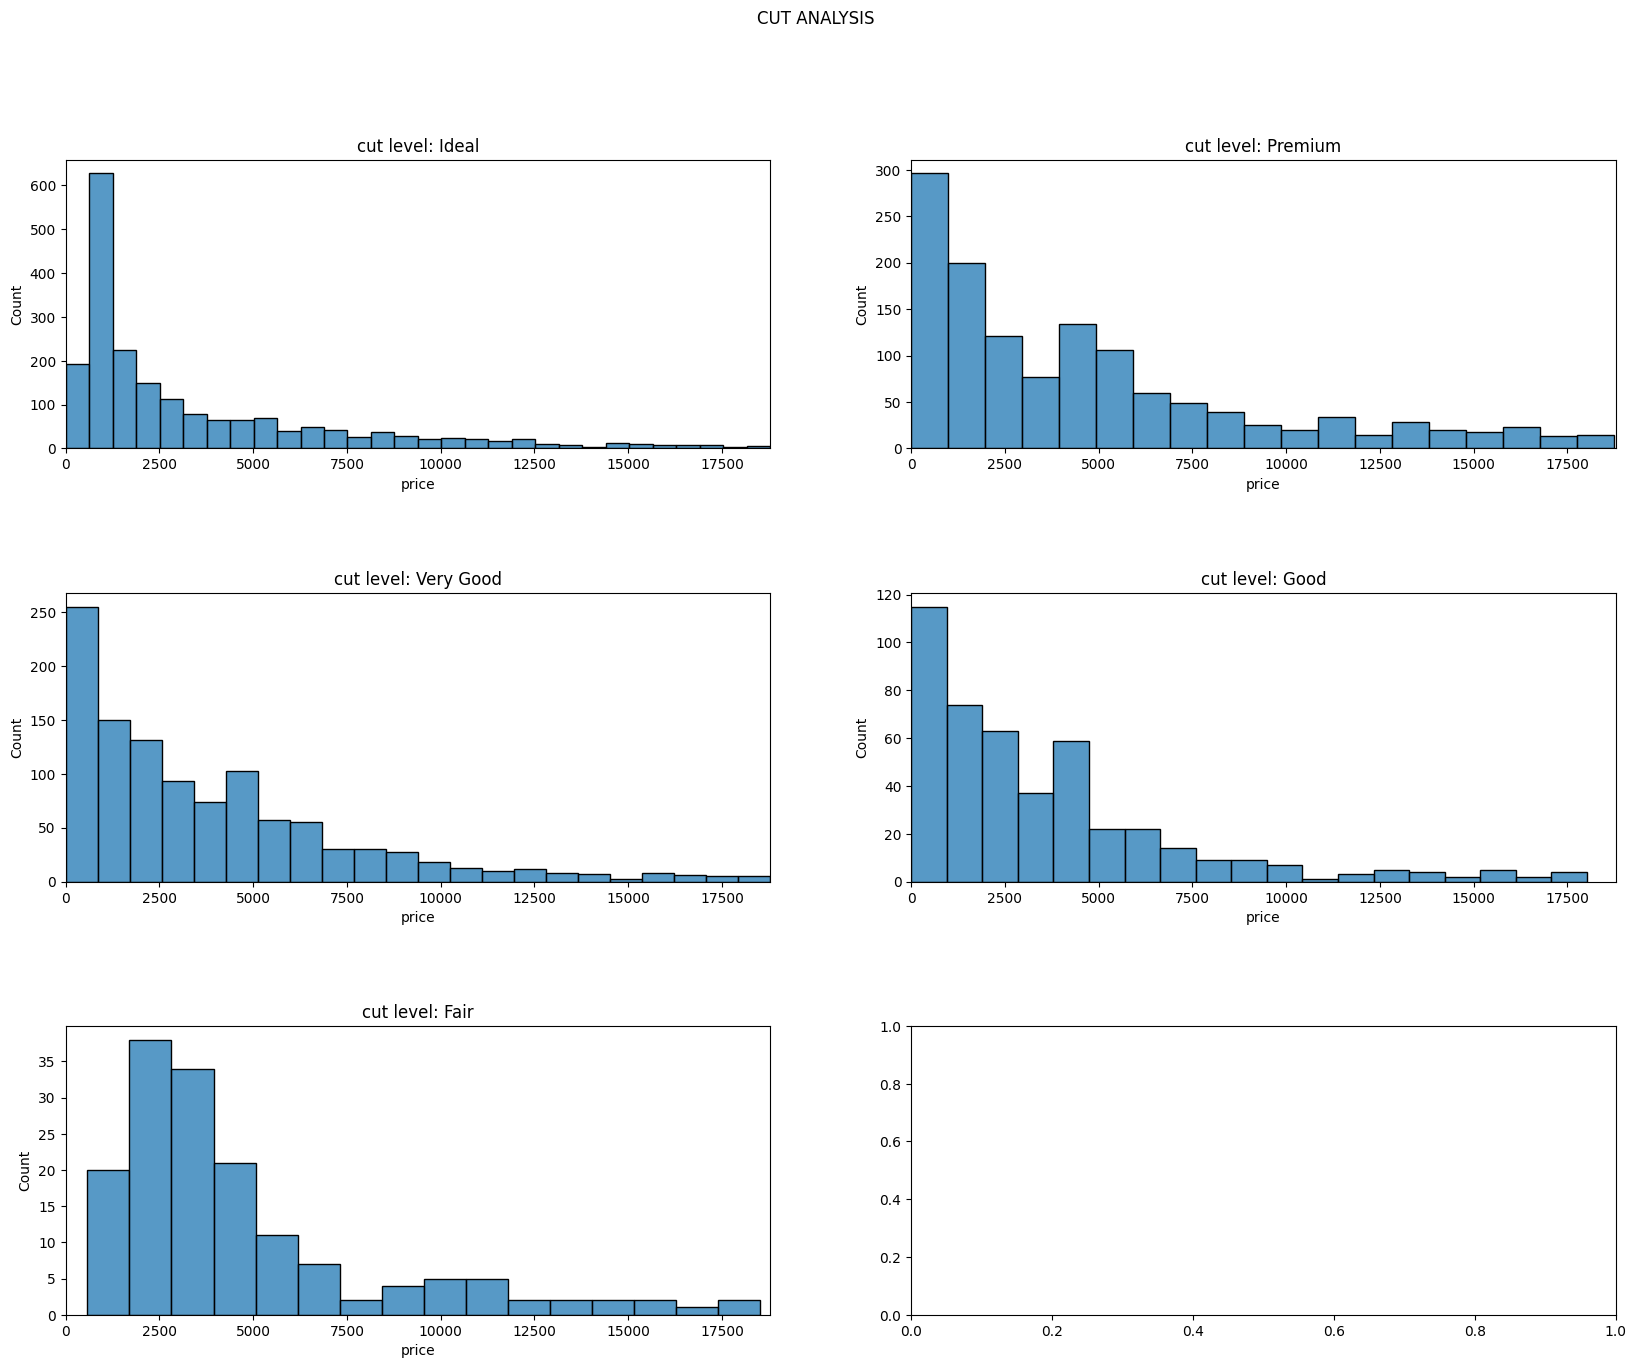

In [74]:
fig, axes = plt.subplots(nrows = 3, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 15)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("CUT ANALYSIS")
#GET ALL THE THRESHOLDS
_col = "cut"

for ax, _cut_level in zip(axes, df[_col].unique()):
  ax.set_xlim(df['price'].min(), df['price'].max())
  sns.histplot(df[df[_col] == _cut_level]["price"], ax = ax)
  ax.set_title(f"{_col} level: {_cut_level}")

Considered alone, this variable doesn't seem able to clearly capture different level of prices

To conclude, among the 4cs, only "carat" seem able to distinguish level of prices. However, this analysis is not enough for exluding the other "Cs", because it could be that the interaction among them will be able to capture nice behaviors. Indeed, having a look online (https://www.gcalusa.com/affect-price.html), for instance they mention how the effect of color on prices change across different levels of clarity. 

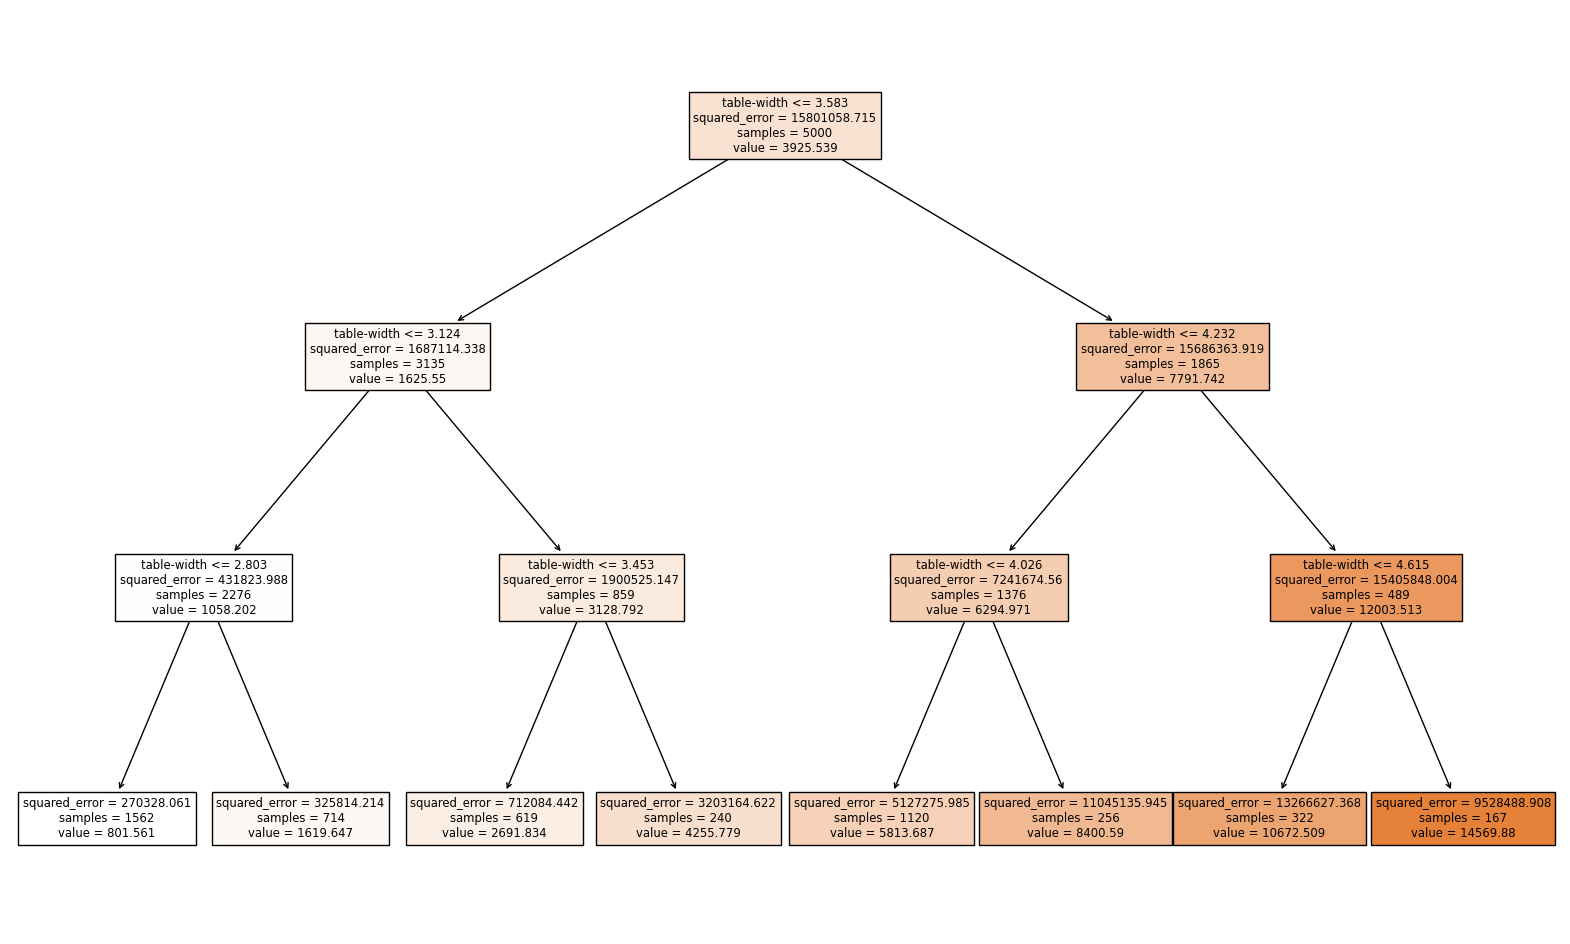

Splitting points: [2.802549958229065, 3.1236000061035156, 3.4532999992370605, 3.583000063896179, 4.025799989700317, 4.232150077819824, 4.615400075912476]


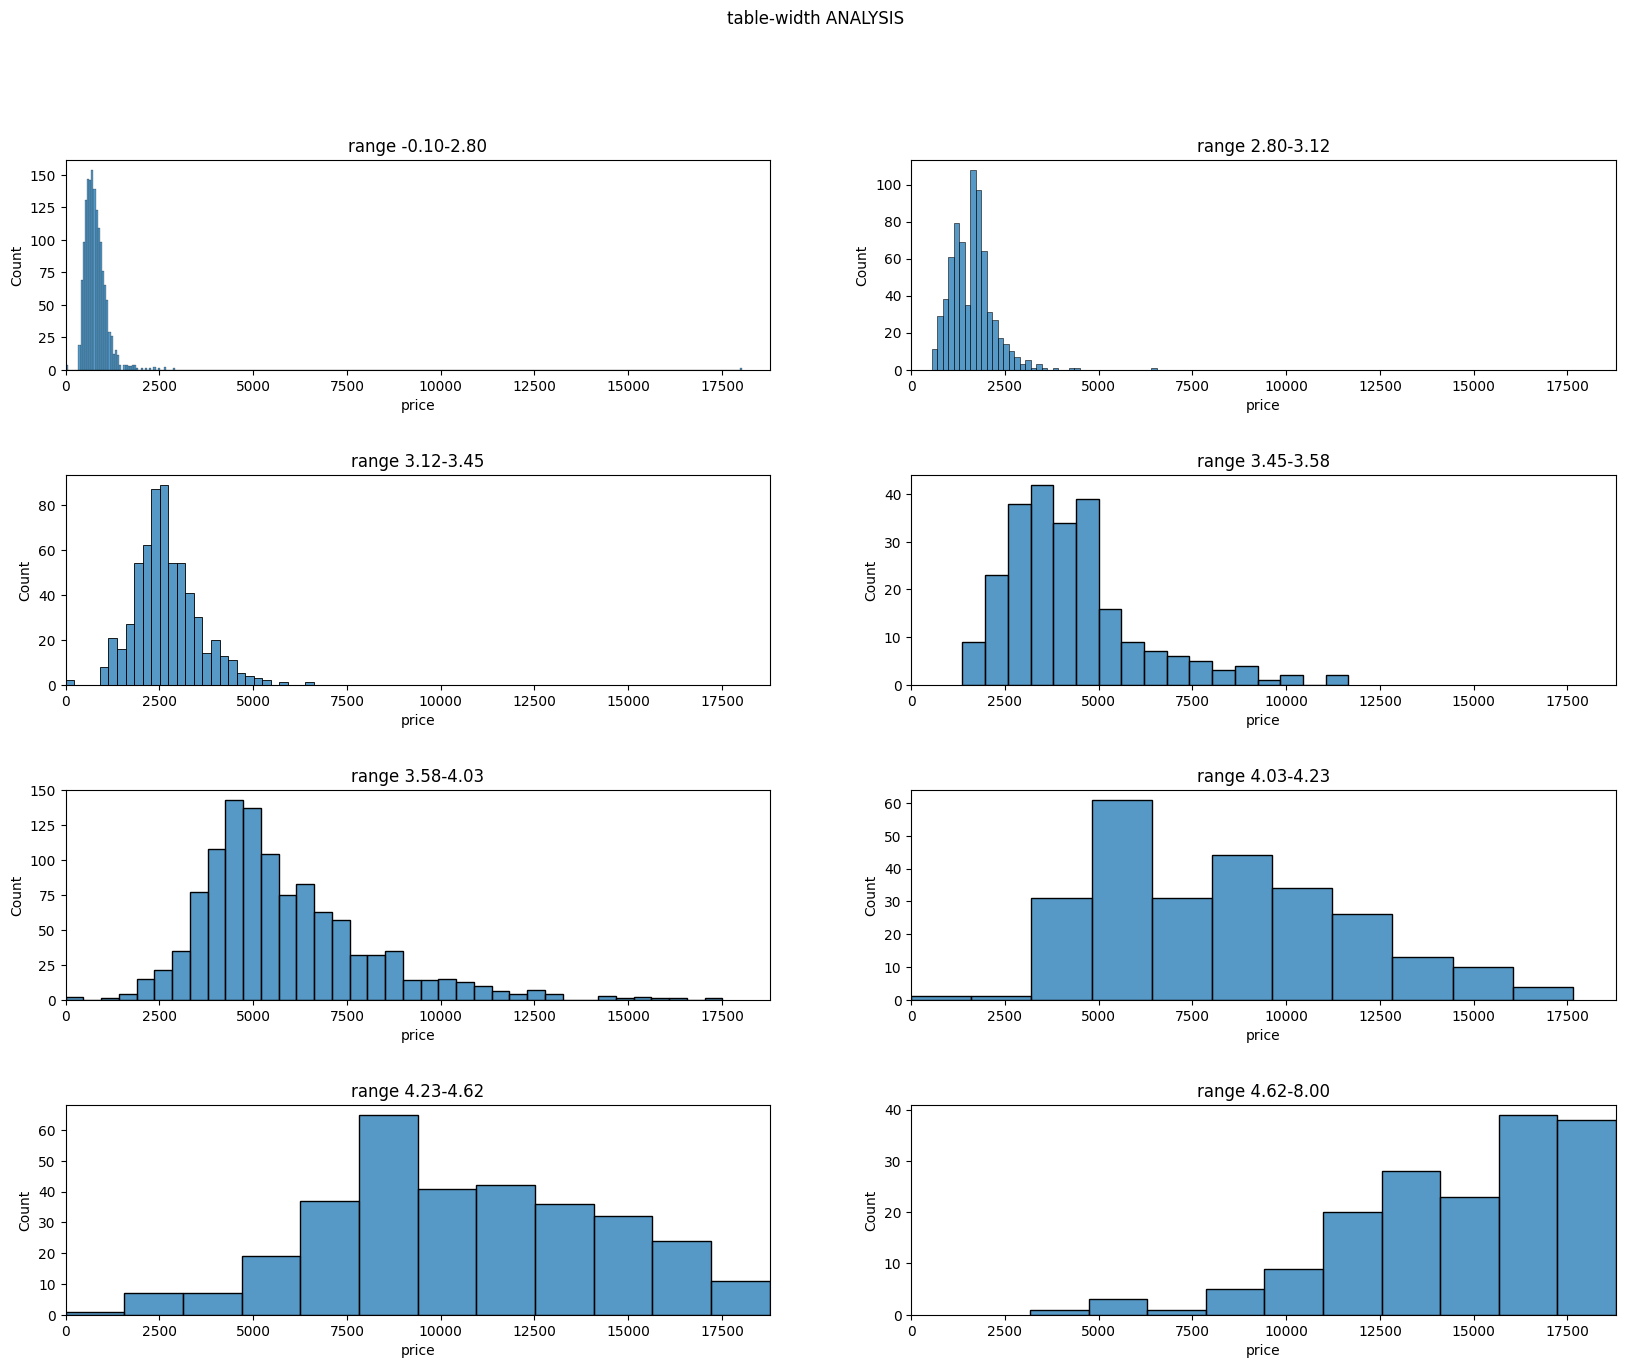

In [79]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

_col = "table-width"

X = df[[_col]]
y = df['price']

model = DecisionTreeRegressor(max_depth=3)  
model.fit(X, y)

plt.figure(figsize=(20, 12))
from sklearn.tree import plot_tree
plot_tree(model, feature_names=[_col], filled=True)
plt.show()
# Extracting splitting points from the decision tree
splitting_points = sorted(model.tree_.threshold[model.tree_.threshold != -2])

# Printing splitting points
print("Splitting points:", splitting_points)

n_points = len(splitting_points)
fig, axes = plt.subplots(nrows = 4, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 15)
plt.subplots_adjust(hspace=0.5)
plt.suptitle(f"{_col} ANALYSIS")
#GET ALL THE THRESHOLDS
_eps: float = 0.1
_limits_: list[tuple] = [(df[_col].min() - _eps, splitting_points[0])]\
    + [(splitting_points[i], splitting_points[i+1]) for i in range(len(splitting_points)-1)]\
        + [(splitting_points[-1], df[_col].max()+_eps)]

for ax, _thresholds in zip(axes, _limits_):
  ax.set_xlim(df['price'].min(), df['price'].max())
  lb, ub = _thresholds #define lower and upper bound of the range
  sns.histplot(df[(df[_col] >= lb) & (df[_col] < ub)]["price"], ax = ax)
  ax.set_title(f"range {lb:.2f}-{ub:.2f}")

In [61]:
df["vol"] = df["x"]*df["y"]*df["z"]

In [64]:
df[["price","x","y","z","carat","depth", "table", "vol", 'z-depth', 'table-width']].corr()["price"]

price          1.000000
x              0.878079
y              0.878892
z              0.871467
carat          0.918933
depth         -0.024915
table          0.140832
vol            0.917874
z-depth        0.852242
table-width    0.853920
Name: price, dtype: float64

#### LAUNCH FIRST MODEL TO SEE HOW IT BEHAVES

In [81]:
from catboost import Pool, cv

In [137]:
x = df[[col for col in df.columns if col!="price"]]
y = df["price"]

In [83]:
cv_dataset = Pool(data=x,
                  label=y,
                  cat_features=[col for col in x.columns if x[col].dtype == "O"])

In [84]:
params = {"iterations": 10000,
          "depth": 4,
          "loss_function": "RMSE",
          "verbose": False}

In [85]:
scores = cv(cv_dataset,
            params,
            fold_count=10)

Training on fold [0/10]

bestTest = 579.8714735
bestIteration = 406

Training on fold [1/10]

bestTest = 734.2221478
bestIteration = 9258

Training on fold [2/10]

bestTest = 980.9421803
bestIteration = 1111

Training on fold [3/10]

bestTest = 579.8645294
bestIteration = 8642

Training on fold [4/10]

bestTest = 797.2774286
bestIteration = 3900

Training on fold [5/10]

bestTest = 833.7231618
bestIteration = 1513

Training on fold [6/10]

bestTest = 567.2560037
bestIteration = 2002

Training on fold [7/10]

bestTest = 704.5779034
bestIteration = 1057

Training on fold [8/10]

bestTest = 600.3776867
bestIteration = 1002

Training on fold [9/10]

bestTest = 563.3055674
bestIteration = 6151



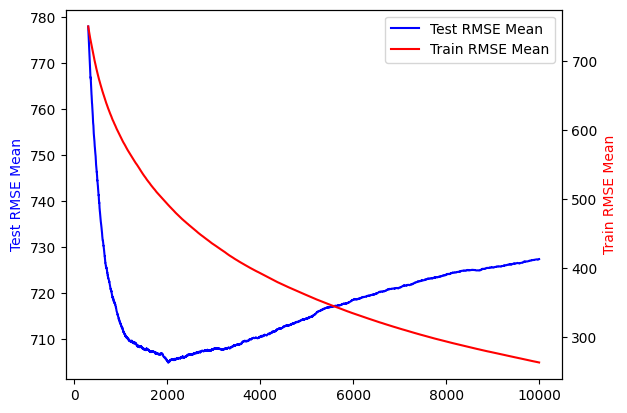

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Plotting the first line on the primary y-axis (left)
ax1.plot(scores["test-RMSE-mean"].iloc[-9700:], color='blue', label='Test RMSE Mean')
ax1.set_ylabel('Test RMSE Mean', color='blue')

# Creating a second y-axis (right)
ax2 = ax1.twinx()

# Plotting the second line on the secondary y-axis (right)
ax2.plot(scores["train-RMSE-mean"].iloc[-9700:], color='red', label='Train RMSE Mean')
ax2.set_ylabel('Train RMSE Mean', color='red')

# Show legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()


In [105]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'z-depth', 'table-width', 'vol'],
      dtype='object')

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1066)

In [139]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

cat_features=[col for col in x.columns if x[col].dtype == "O"]

train_pool = Pool(X_train, y_train, cat_features)
test_pool = Pool(X_test, y_test, cat_features)

model = CatBoostRegressor(iterations=3000, max_depth=4, random_seed=1066)
model.fit(X_train, y_train, eval_set=test_pool, cat_features=cat_features, use_best_model=True, early_stopping_rounds=10)

rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(f"RMSE: {rmse:.4f}")

Learning rate set to 0.032387
0:	learn: 3880.7682463	test: 3827.4228857	best: 3827.4228857 (0)	total: 1.77ms	remaining: 5.31s
1:	learn: 3781.5287809	test: 3730.3014637	best: 3730.3014637 (1)	total: 2.8ms	remaining: 4.2s
2:	learn: 3685.7221376	test: 3638.0043190	best: 3638.0043190 (2)	total: 3.73ms	remaining: 3.73s
3:	learn: 3594.3874086	test: 3549.1706724	best: 3549.1706724 (3)	total: 4.73ms	remaining: 3.54s
4:	learn: 3503.5297337	test: 3461.0943633	best: 3461.0943633 (4)	total: 5.75ms	remaining: 3.45s
5:	learn: 3416.9980565	test: 3376.9388200	best: 3376.9388200 (5)	total: 6.7ms	remaining: 3.34s
6:	learn: 3332.9518673	test: 3295.2422079	best: 3295.2422079 (6)	total: 7.7ms	remaining: 3.29s
7:	learn: 3253.8511276	test: 3217.9744557	best: 3217.9744557 (7)	total: 8.62ms	remaining: 3.22s
8:	learn: 3174.1669365	test: 3140.0646562	best: 3140.0646562 (8)	total: 9.62ms	remaining: 3.2s
9:	learn: 3099.4992256	test: 3066.3882926	best: 3066.3882926 (9)	total: 10.5ms	remaining: 3.15s
10:	learn: 3026

Text(0.5, 1.0, 'Feature Importance')

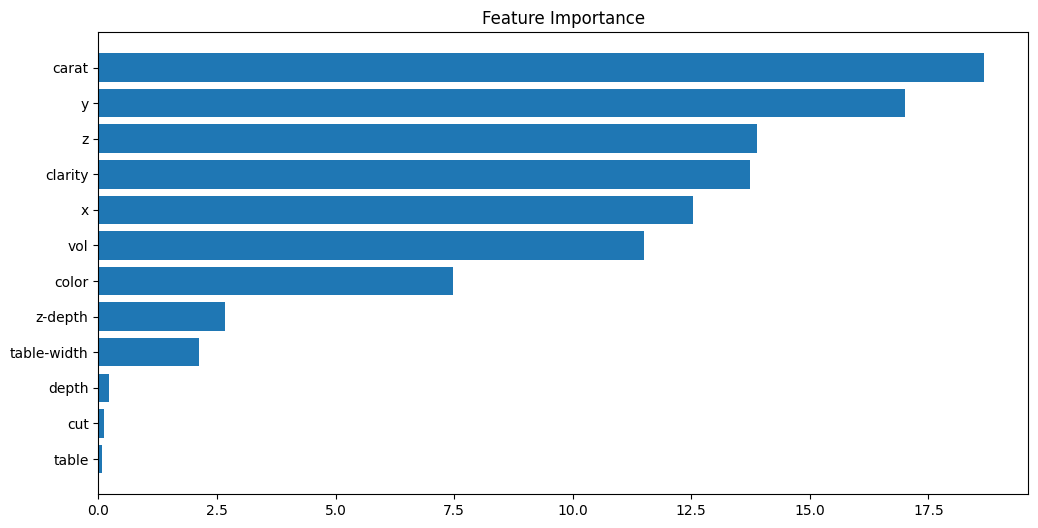

In [140]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
